In [1]:
import scanpy as sc
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import colors
import seaborn as sb
import rpy2.rinterface_lib.callbacks
import logging
import scrublet as scr
from rpy2.robjects import pandas2ri
import anndata2ri

In [2]:
# Ignore R warning messages
#Note: this can be commented out to get more verbose R output
rpy2.rinterface_lib.callbacks.logger.setLevel(logging.ERROR)

# Automatically convert rpy2 outputs to pandas dataframes
pandas2ri.activate()
anndata2ri.activate()
%load_ext rpy2.ipython

plt.rcParams['figure.figsize']=(8,8) #rescale figures
sc.settings.verbosity = 3
#sc.set_figure_params(dpi=200, dpi_save=300)
sc.logging.print_header()

scanpy==1.7.2 anndata==0.7.6 umap==0.5.1 numpy==1.19.5 scipy==1.6.3 pandas==1.2.4 scikit-learn==0.24.2 statsmodels==0.12.2 python-igraph==0.9.1 louvain==0.7.0


In [3]:
%%R
# Load libraries from correct lib Paths for my environment - ignore this!
.libPaths("/home/spuccio/anaconda3/envs/singlecell/lib/R/library/")

library(clustree)


In [4]:
adata = sc.read("/mnt/lugli/spuccio/SP028_Autoimmunity/Cariplo/IBD_counts/h5files/DESC_obj_onlyIBD.h5ad")

In [5]:
adata2 = sc.read("/mnt/lugli/spuccio/SP028_Autoimmunity/Cariplo/IBD_counts/h5files/DESC_obj_onlyIBD.h5ad")

In [6]:
sc.pp.normalize_total(adata, target_sum=1e4)

normalizing counts per cell
    finished (0:00:03)


In [7]:
sc.pp.log1p(adata)

In [13]:
sc.pp.scale(adata, max_value=3,zero_center=True)

In [8]:
colors2 = plt.cm.Reds(np.linspace(0, 1, 128))
colors3 = plt.cm.Greys_r(np.linspace(0.7,0.8,20))
colorsComb = np.vstack([colors3, colors2])
mymap = colors.LinearSegmentedColormap.from_list('my_colormap', colorsComb)

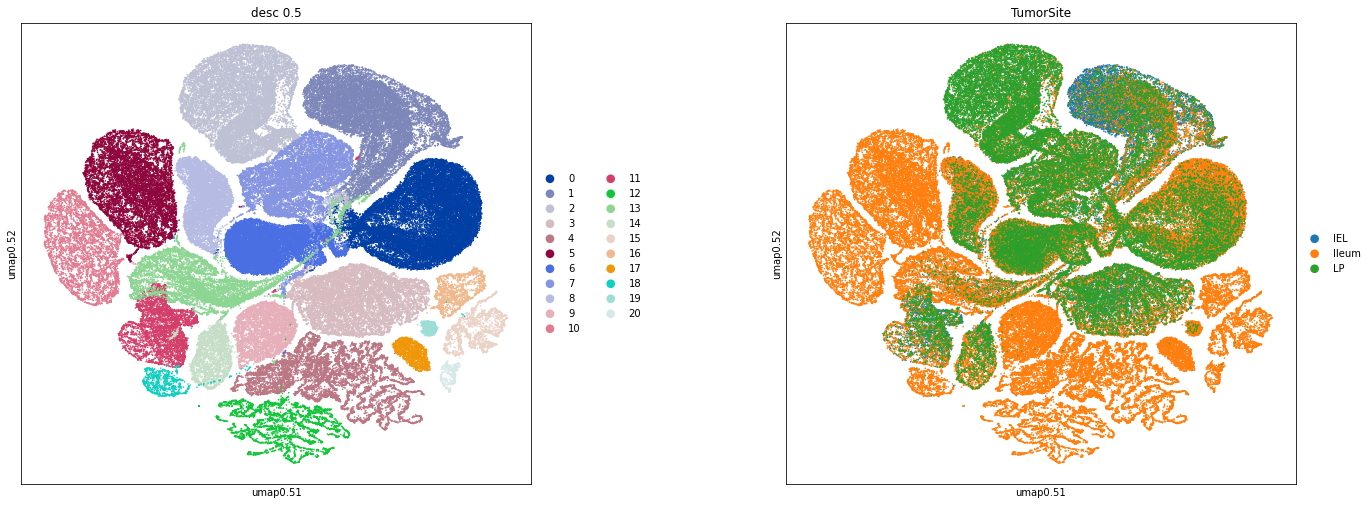

In [12]:
plt.rcParams['figure.figsize']=(8,8)
sc.pl.scatter(adata,basis="umap0.5",color=['desc_0.5',"TumorSite"],size=10)

In [14]:
def run_vis(adata):
    if 'X_emb' in adata.obsm:
        sc.pp.neighbors(adata, use_rep='X_emb')
        sc.tl.umap(adata)
    else:
        sc.pp.pca(adata, svd_solver='arpack')
        sc.pp.neighbors(adata)
        sc.tl.umap(adata)

In [15]:
adata.obsm['X_emb'] = adata.obsm['X_Embeded_z'+str(0.5)]
run_vis(adata)

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:24)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:03:25)


In [16]:
adata.raw = adata

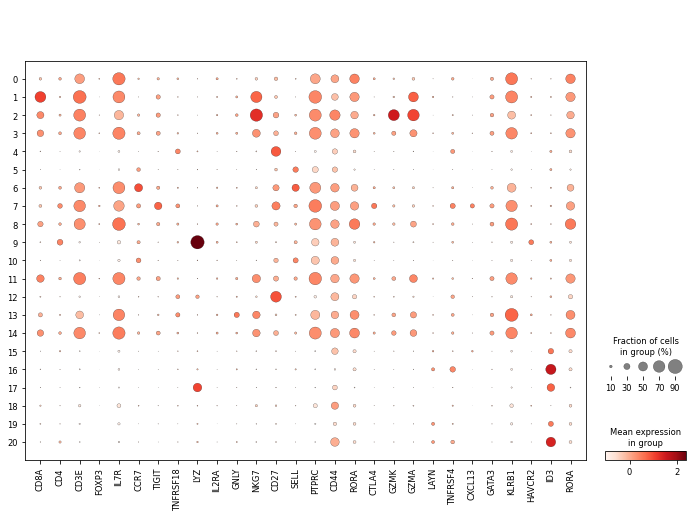

In [17]:
sc.pl.dotplot(adata, ['CD8A','CD4','CD3E','FOXP3','IL7R','CCR7','TIGIT','TNFRSF18','LYZ','IL2RA','GNLY','NKG7','CD27','SELL','PTPRC','CD44','RORA','CTLA4','GZMK','GZMA','LAYN','TNFRSF4','CXCL13','GATA3','KLRB1','HAVCR2','ID3','RORA'], groupby='desc_0.5');

In [20]:
adata.obs['desc_0.5'].value_counts()

0     20755
1     15972
2     15501
6     12830
3     10875
7     10618
4      9628
5      9598
8      7220
13     7165
9      4610
11     4532
10     4145
12     3688
14     2650
15     1966
16     1611
17     1567
18      841
19      627
20      399
Name: desc_0.5, dtype: int64

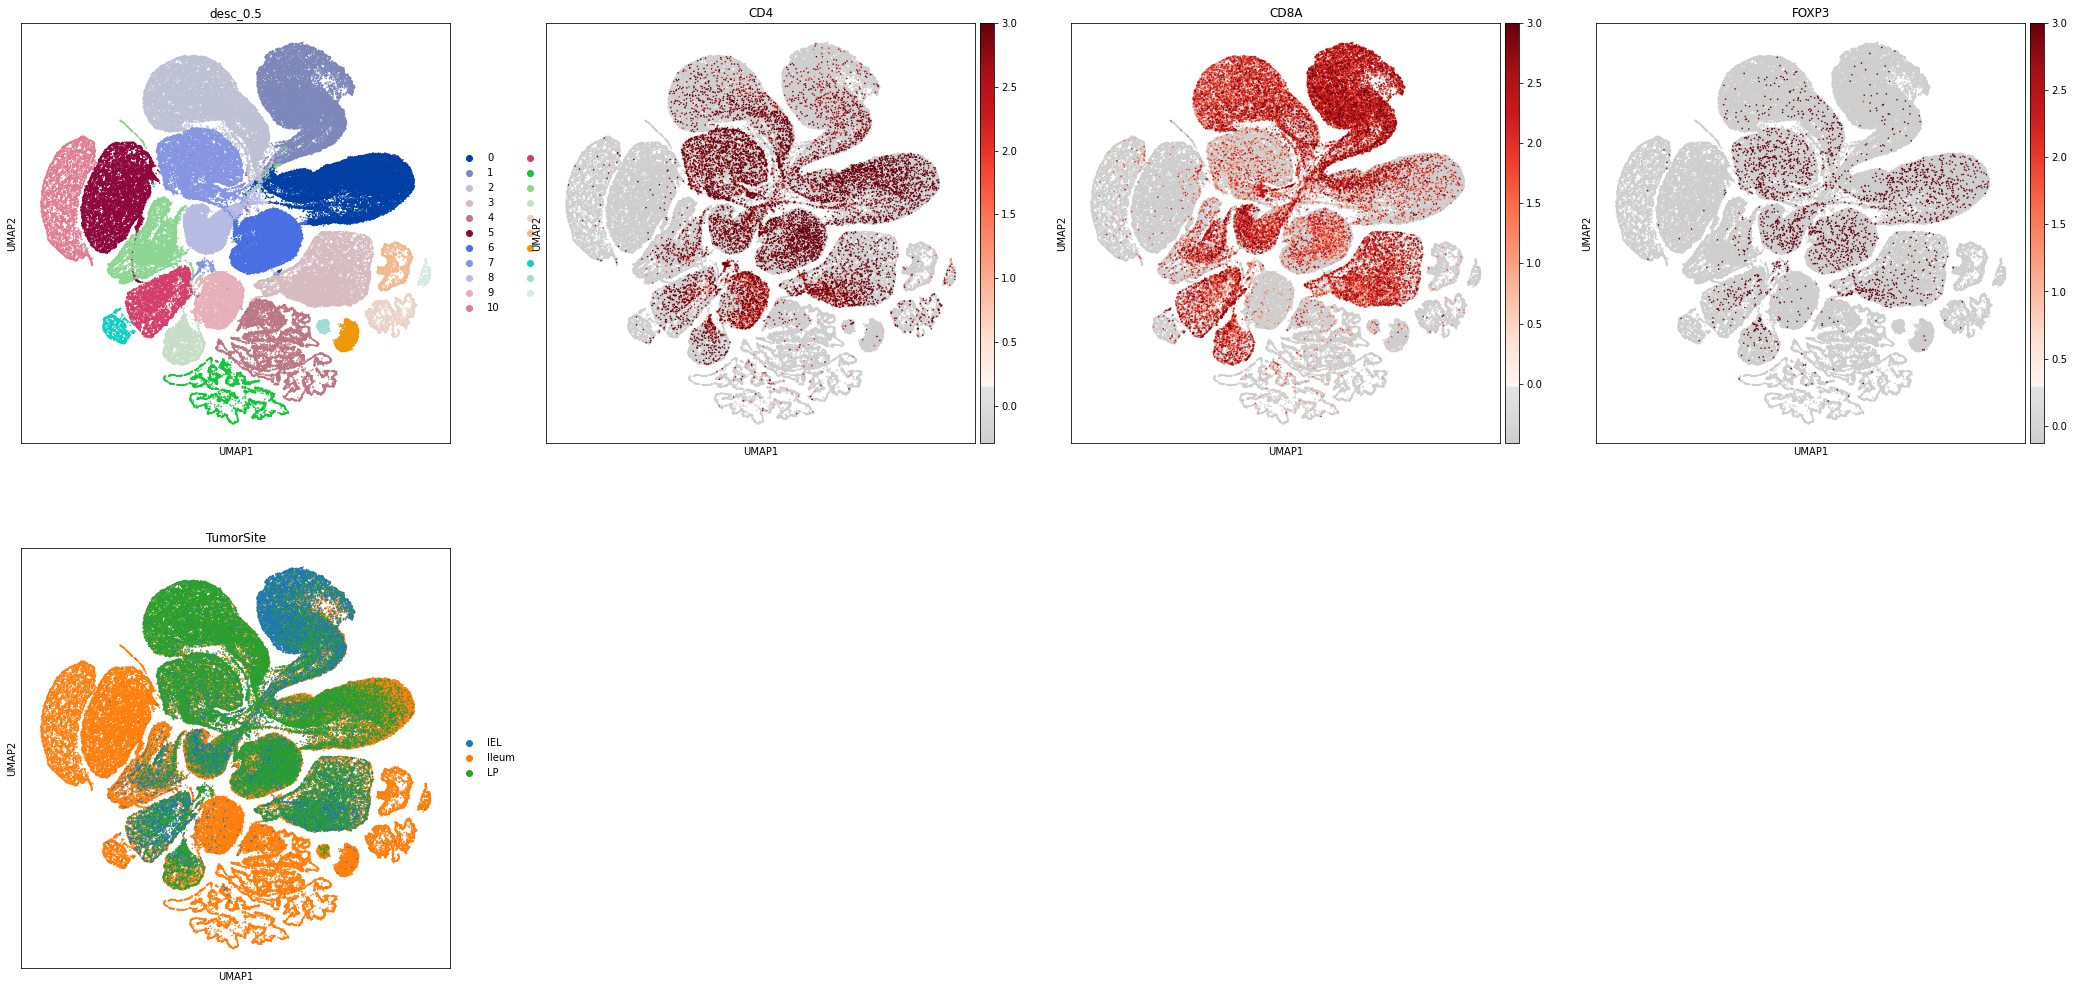

In [27]:
sc.pl.umap(adata, color=['desc_0.5','CD4','CD8A','FOXP3','TumorSite'],s=10,color_map=mymap,neighbors_key="Embeded_z0.5")

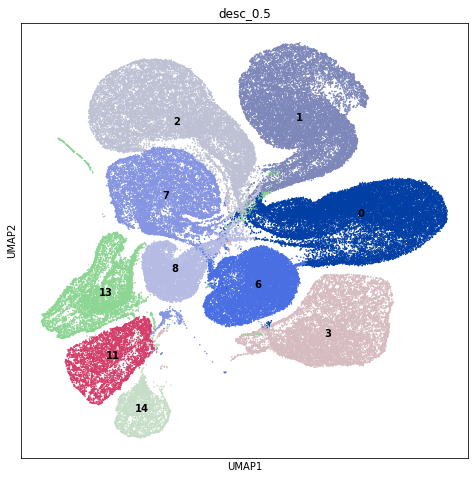

In [28]:
sc.pl.umap(adata_T, color=['desc_0.5'],s=10,color_map=mymap,neighbors_key="Embeded_z0.5",legend_loc='on data')

In [26]:
adata_T = adata[adata.obs['desc_0.5'].isin([0,1,2,3,6,7,8,11,13,14]),:]

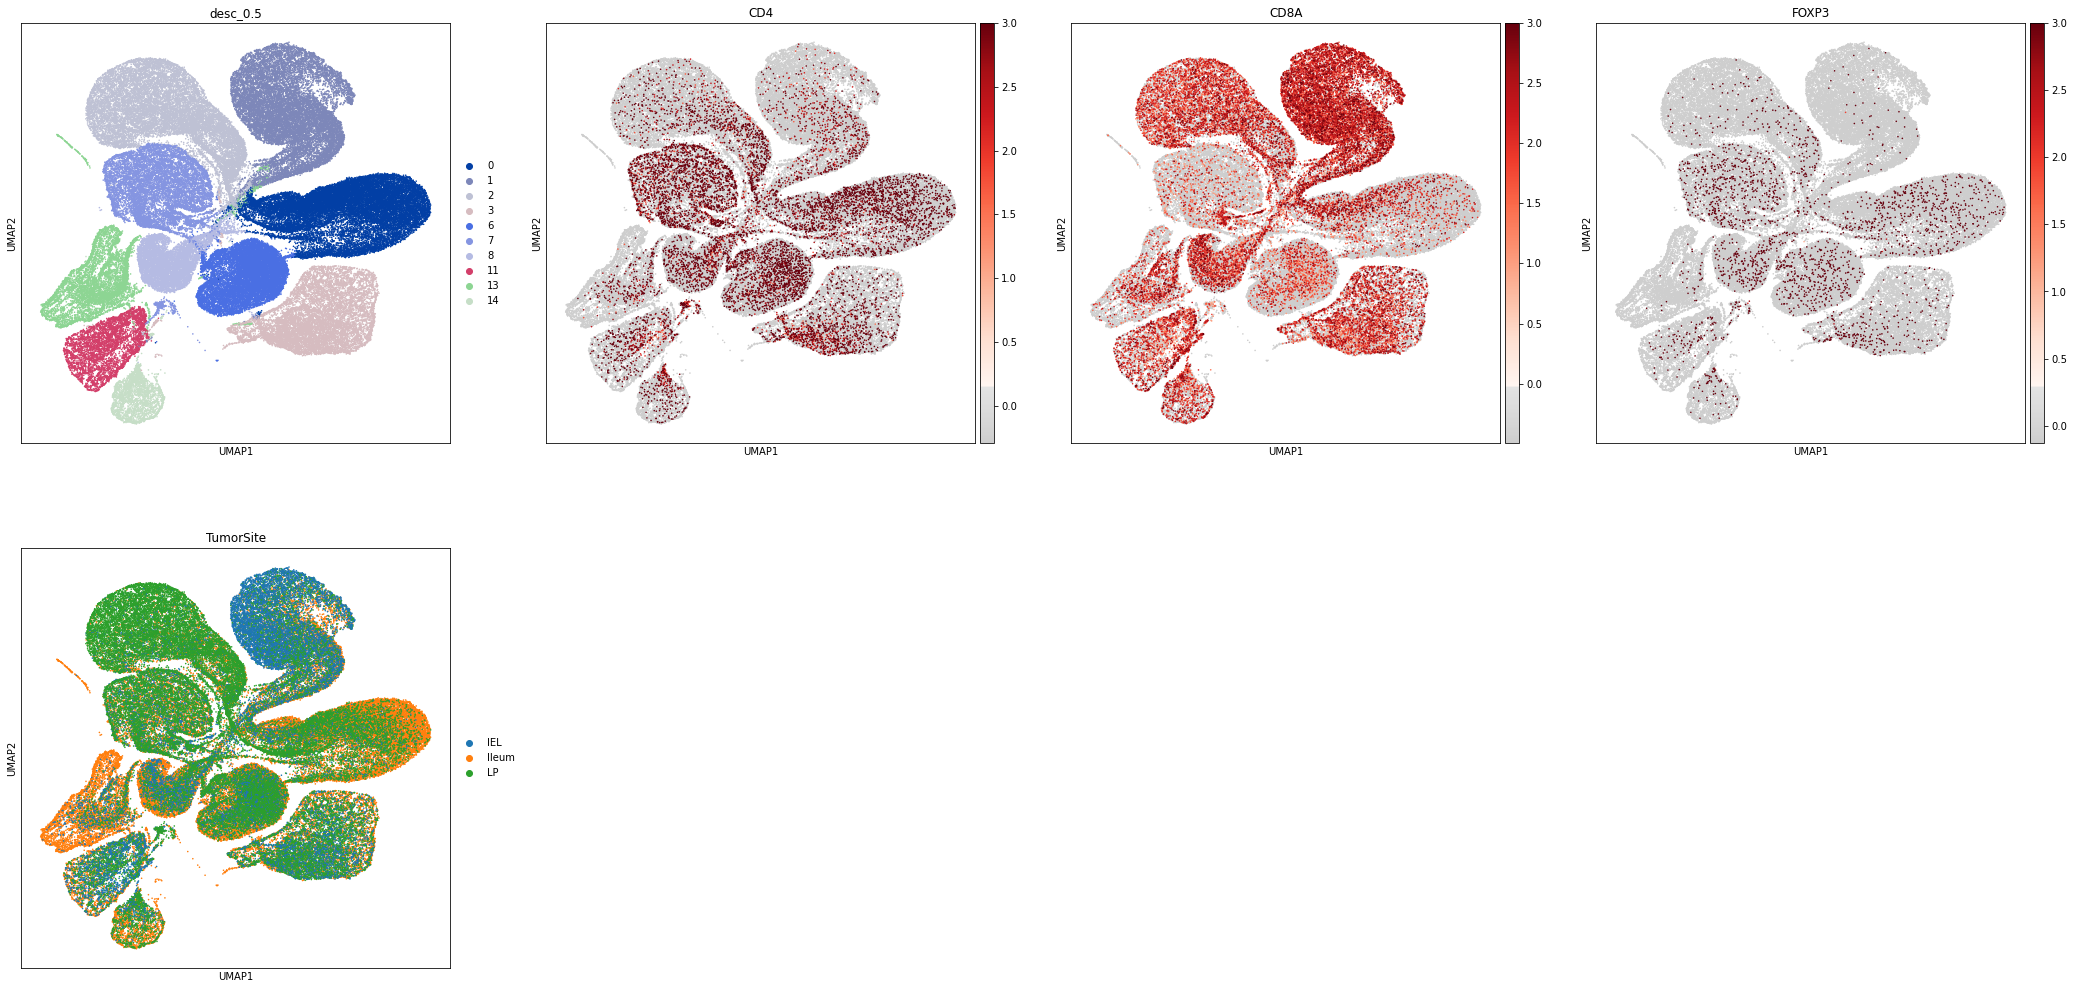

In [29]:
sc.pl.umap(adata_T, color=['desc_0.5','CD4','CD8A','FOXP3','TumorSite'],s=10,color_map=mymap,neighbors_key="Embeded_z0.5")

In [30]:
adata3 = adata2[adata2.obs.index.isin(adata_T.obs.index),:]

In [31]:
adata3.raw = adata3

In [32]:
adata3.write("/mnt/lugli/spuccio/SP028_Autoimmunity/Cariplo/IBD_counts/h5files/IBD_T_cell.h5ad")